# Generative Models

### Exercise 1 - Transposed Convolution

**Summary:**

In this exercise you will learn how to use the Conv2DTranspose layer to "scale-up" a feature map from a lower dimension to a higher dimension inside a CNN. 
I have provided you (cell below) with a stub of an autoencoder (the down-path). 
 
**Your Tasks in this exercise:**
* Add Conv2DTranspose layers to the autoencoder to match the input shape with the network's output shape. Use the ```model.summary()``` method to track and understand your progress. 

**Find out and Answer:**
* What is the impact of using different strides and padding settings? 
* What is the impact of using different kernel sizes ?
* How many filters should we use in each layer of the up-sampling path, what makes sense?




In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, InputLayer

model = tf.keras.Sequential()
model.add(InputLayer(input_shape=(128,128,3)))
model.add(Conv2D(filters=8, kernel_size=(4,4), strides=(2,2), padding='same'))
model.add(Conv2D(filters=16, kernel_size=(4,4), strides=(2,2), padding='same'))
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(2,2), padding='same'))

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 64, 64, 8)         392       
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 16)        2064      
                                                                 
 conv2d_36 (Conv2D)          (None, 16, 16, 32)        8224      
                                                                 
Total params: 10,680
Trainable params: 10,680
Non-trainable params: 0
_________________________________________________________________


### Exercise 2 - Autoencoder

**Summary:**

In this exercise you will create a *convolutional* autoencoder that can be used for the mnist data. 

**Data**: 

In this exercise we will use the mnist dataset. The mnist dataset is a small and simple dataset containing images of numbers between 0-9. 
I have provided you with a cell to load and preprocess the dataset below. Have a look at the data to get a solid understanding on what you 
are working with. 

**Your Tasks in this exercise:**

* Build a *convolutional* (using Conv2D and Conv2DTranspose layers) autoencoder for the mnist data. 
* Think about what *activation* functions make sense
* Make sure you build the autoencoder using the **U** architecture (see slides)
* 1x1 Conv2D layers can be used to "reshape" the final output
* Train the autoencoder using the training portion of the mnist data 
* Visualize your results 


**Find out and Answer:**
* Explain which activation functions you chose and why you chose them. 
* What happens if we use different kernel sizes in the Conv2D and the associated Conv2DTranspose layer.








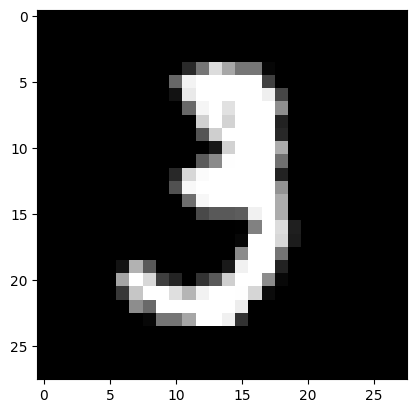

In [59]:
import matplotlib.pyplot as plt 

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
plt.imshow(x_train[10,:], cmap='gray')

x_train = x_train / 255
x_test = x_test / 255

### Exercise 3 - Autoencoders for Denoising

**Summary:**
In this exercise you will build and train an autoencoder to remove noise from images. We can do this by starting with "clean" image-data and adding artifical noise to it. The training subjective for the autoencoder is to reconstruct the "clean" image from the noisy input. 

**Data**: 
In this exercise we will use the mnist dataset. The mnist dataset is a small and simple dataset containing images of numbers between 0-9. 
I have provided you with a cell to load and preprocess the dataset below. Have a look at the data to get a solid understanding on what you 
are working with. 

**Your Tasks in this exercise:**

* Build a *convolutional* (using Conv2D and Conv2DTranspose layers) autoencoder for the mnist data. 
* Create a noisy input dataset by adding artificial noise to the mnist data. We can put noise into an image by simply adding a random vector (you can use ```np.random.randn()``` to create random noise-tensors). 
* Train your autoencoder model using a suitable loss function. 
* Evaluate your results on the (noisy and clean) test portion of the mnist dataset, visualize your results. 


**Find out and Answer:**
* What loss function did you choose and why?
* How many layers do you need and how many filters for each layer do you need to get satisfying results?
* What is the highest amount of noise (standard deviation of the gaussian distribution used to generate the noise) the autoencoder can still handle?

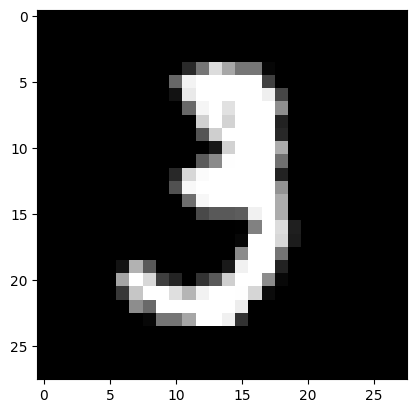

In [160]:
import matplotlib.pyplot as plt 

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

### Exercise 4 - Latent Space of an Autoencoder


**Summary:**


**Data**: 
In this exercise we will use the mnist dataset. The mnist dataset is a small and simple dataset containing images of numbers between 0-9. 
I have provided you with a cell to load and preprocess the dataset below. Have a look at the data to get a solid understanding on what you 
are working with. 

**Your Tasks in this exercise:**

* Build an train an autoencoder for the mnist data. 
* Split the autoencoder model into an encoder and decoder part (use the functional API via ```tf.keras.Model(inputs=, outputs=)```).
* Compute the latent vector for an image.
* Modify the latent vector and reconstruct it, compare it to the original.
* Create a random latent vector and reconstruct it, compare it to the original. 

**Find out and Answer:**
* How does modifying the latent vector influence the reconstruction result ?





In [185]:
import matplotlib.pyplot as plt 

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

### Exercise 5 - Variational Autoencoder


**Summary:**

In this exercise we will study the implementation and behavior of *Variational Autoencoders*. I have provided you with an implementation of a simple Variational Autoencoder in the cells below. We will use the code to learn how the theory connects to the real world. 

**Data**: 

In this exercise we will use the mnist dataset. The mnist dataset is a small and simple dataset containing images of numbers between 0-9. 
I have provided you with a cell to load and preprocess the dataset below. Have a look at the data to get a solid understanding on what you 
are working with. 

**Your Tasks in this exercise:**

* Read through and understand the source code and answer the questions below. 
* Write comments for the source code in a meaningful way. 
* Train the Variational Autoencoder for 1,5,15 and 30 epochs, plot the label-clusters and latent-space for each. 
* Interpret the label-clusters and latent-space for each trained epoch. 
* Create an image using the trained decoder of the number 4, 3 and 7 by manually creating the corresponding latent-space representation. 


**Find out and Answer:**
* Explain why we use the sampling layers, what does it do?
* Explain the architectural difference of the neural nets compared to the autoencoders you created before. 
* Explain the loss function. 
* What is the input to decoder?



This cell loads a file with some helper functions for plotting and prepares the data for the VAE. 

In [266]:
!wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/Computer-Vision-Generative-Models/vae_helpers.py
from vae_helpers import plot_label_clusters, plot_latent_space

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255


'wget' is not recognized as an internal or external command,
operable program or batch file.


This cells implements a custom layer, the sampling layer. 


In [237]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [269]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_113 (InputLayer)         [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_224 (Conv2D)            (None, 14, 14, 32)   320         ['input_113[0][0]']              
                                                                                                  
 conv2d_225 (Conv2D)            (None, 7, 7, 64)     18496       ['conv2d_224[0][0]']             
                                                                                                  
 flatten_12 (Flatten)           (None, 3136)         0           ['conv2d_225[0][0]']             
                                                                                            

In [270]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_114 (InputLayer)      [(None, 2)]               0         
                                                                 
 dense_8 (Dense)             (None, 3136)              9408      
                                                                 
 reshape_7 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_156 (Conv2  (None, 14, 14, 64)       36928     
 DTranspose)                                                     
                                                                 
 conv2d_transpose_157 (Conv2  (None, 28, 28, 32)       18464     
 DTranspose)                                                     
                                                                 
 conv2d_transpose_158 (Conv2  (None, 28, 28, 1)        289 

This cell implements a custom Model. Custom models can be very useful if we wish to have more flexibility in how we train and what loss we use. For more sophisticated applications the keras out-of-the-box functionality is often not enough and we use custom Model implementations. 

* The ```metrics()``` function tells keras which metric-trackers should be reset upon the start of each epoch. 
* The ```train_step()``` function is called by keras for each batch. It is up to use to implement the training. The computation of gradients is done here using GradientTapes.

In [274]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

This cell performs the training of the model. 

In [275]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)

Epoch 1/30
547/547 [==============================] - 51s 89ms/step - loss: 183.1815 - reconstruction_loss: 172.2768 - kl_loss: 3.8830
Epoch 2/30
 26/547 [>.............................] - ETA: 47s - loss: 165.9581 - reconstruction_loss: 161.6167 - kl_loss: 4.8066

KeyboardInterrupt: 

This cell plots the latent space. 

1/1 [==============================] - 0s 53ms/step


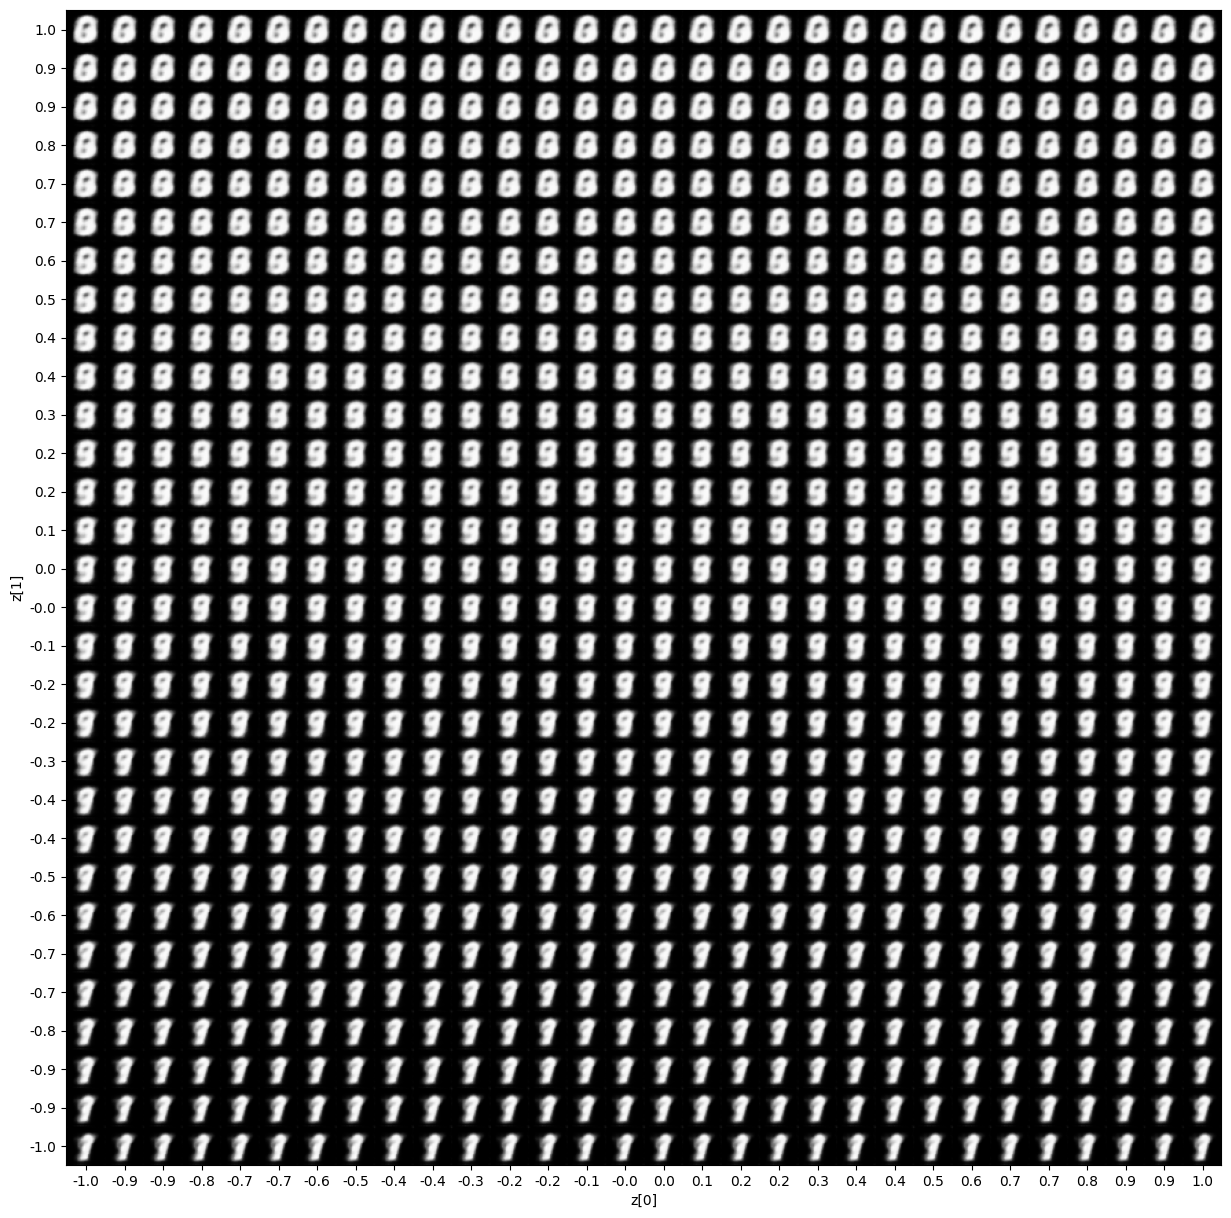

In [273]:
plot_latent_space(vae)

This cell plots the label clusters. 

1875/1875 [==============================] - 38s 20ms/step


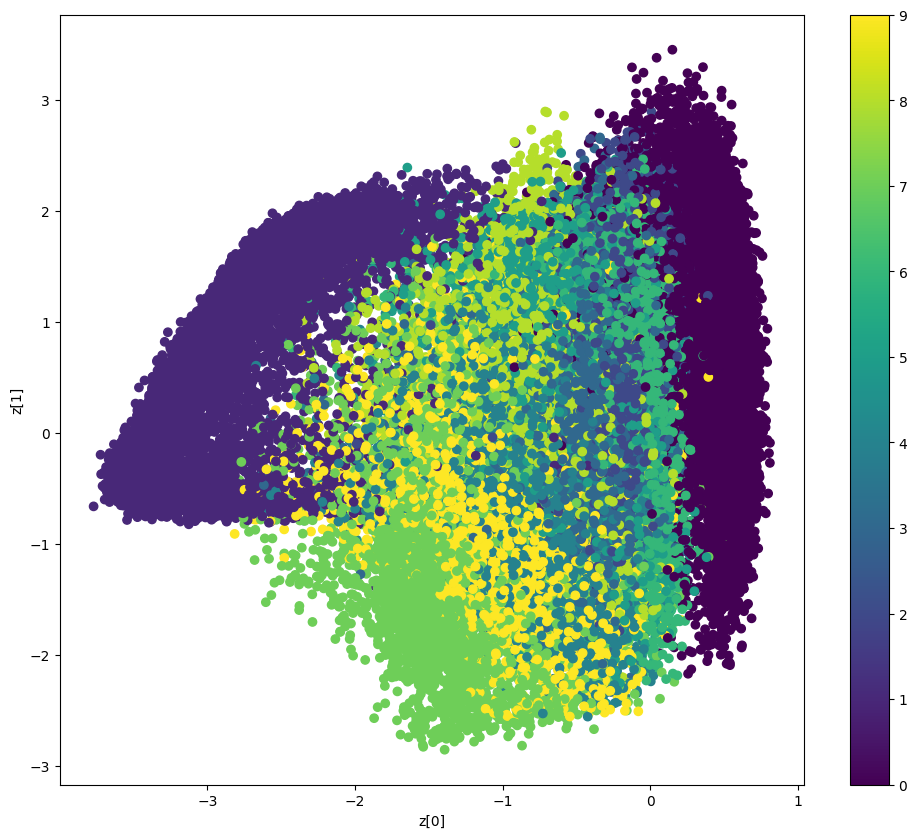

In [244]:
(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)

In [301]:
np.log(0.1)

-2.3025850929940455